# 1.Should I wear a face mask in public?
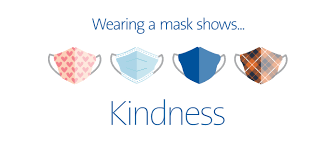

The recent rise in community transmission of COVID-19 in Australia means some states and territories now recommend or require the use of masks. Currently this includes Victoria, New South Wales and Queensland.

Since then, there is an ongoing debate on the potential usefulness of wearing masks. In this notebook, I am going to analyse the data from https://ourworldindata.org/covid-cases, to decide the importance of wearing masks properly. 


In [1]:
# importing modules
import pandas as pd
# Read aus_covid_data_before into daily
daily = pd.read_csv("aus_covid_data.csv",parse_dates=["date"])

# Print out yearly
print(daily)

          date  new_cases_per_million  total_cases_per_million
0   2019-12-31                  0.000                    0.000
1   2020-01-01                  0.000                    0.000
2   2020-02-01                  0.000                    0.000
3   2020-03-01                  0.000                    0.000
4   2020-04-01                  0.000                    0.000
5   2020-05-01                  0.000                    0.000
6   2020-06-01                  0.000                    0.000
7   2020-07-01                  0.000                    0.000
8   2020-08-01                  0.000                    0.000
9   2020-09-01                  0.000                    0.000
10  2020-10-01                  0.000                    0.000
11  2020-11-01                  0.000                    0.000
12  2020-12-01                  0.000                    0.000
13  2020-01-13                  0.000                    0.000
14  2020-01-14                  0.000                  

In [2]:
# Calculate proportion of new cases per no. total cases
daily["proportion_newcases"]=daily["new_cases_per_million"]/daily["total_cases_per_million"]

# Print out the first rows in daily
daily.head()

,date,new_cases_per_million,total_cases_per_million,proportion_newcases
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-02-01,0.0,0.0,NaN
3,2020-03-01,0.0,0.0,NaN
4,2020-04-01,0.0,0.0,NaN


Text(0, 0.5, 'Proportion New Cases')

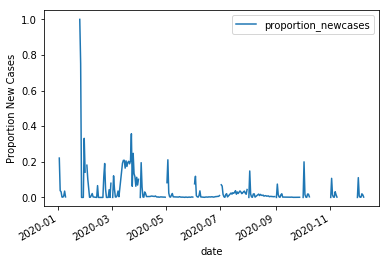

In [3]:
%matplotlib inline

#Plot the speed of daily added cases
ax = daily.plot(x="date", y="proportion_newcases")
ax.set_ylabel("Proportion New Cases")

#### The effect of maskwearing

Text(0, 0.5, 'Proportion new cases')

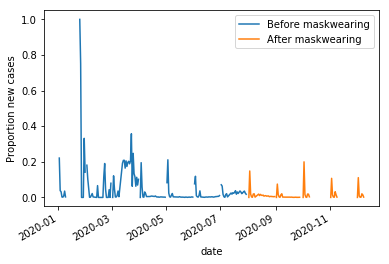

In [4]:
# Date when maskwearing was made mandatory
import pandas as pd
maskwearing_start = pd.to_datetime('31-07-2020')

# Split daily into before and after maskwearing_start
before_wearing = daily[daily["date"] < maskwearing_start]
after_wearing = daily[daily["date"] >= maskwearing_start]

# Plot daily proportion of new cases before and after maskwearing
ax = before_wearing.plot(x="date", y="proportion_newcases",
                         label="Before maskwearing")
after_wearing.plot(x="date", y="proportion_newcases",
                   label="After maskwearing", ax=ax)
ax.set_ylabel("Proportion new cases")

#### More Maskwearing, less new cases?

In [5]:
before_proportion = before_wearing["proportion_newcases"]
after_proportion = after_wearing["proportion_newcases"]
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.035294863564230394

#### A Bootstrap analysis of Australia Covid-19 new cases data

In [6]:
# A bootstrap analysis of the reduction of newly added cases due to maskwearing
boot_mean_diff = []
for i in range(300):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.057109
0.975   -0.017923
dtype: float64

In [7]:
# The data we analysed points to that:
we_should_wear_masks = True

So weaking mask reduced the proportion of newly added cases by between 1.79 and 3.53 percentage points, according to a 95% confidence interval. All in all, it would seem that we had reasonable evidence that maskwearing was a simple but highly effective procedure that could save many lives.

Thank you for your reading, and feel free to let me know your thoughts.